In [1]:
from datasets import load_dataset

/home/user01/anaconda3/envs/vim_kh/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load the dataset
dataset = load_dataset("imagenet-1k", split='train')
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 1281167
})

In [3]:
# from torchvision import transforms
# import randomerasing and randaugment from timm
from timm.data import create_transform

transform = create_transform(
    input_size=224,
    is_training=True,
    color_jitter=0.4,
    auto_augment='rand-m9-mstd0.5',
    re_prob=0.25,
    re_mode='pixel',
    re_count=1,
    interpolation='bicubic',
    mean=(0.485, 0.456, 0.406),
    std=(0.229, 0.224, 0.225),
)

def transform_function(examples):
    examples['pixel_values'] = [transform(image) for image in examples['image']]
    return examples

dataset.set_transform(transform_function)

In [4]:
transform

Compose(
    RandomResizedCropAndInterpolation(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BICUBIC)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

In [15]:
transforms.transforms[2]

In [ ]:
Compose(
    RandomResizedCropAndInterpolation(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BICUBIC)
    RandomHorizontalFlip(p=0.5)
    <timm.data.auto_augment.RandAugment object at 0x7f99f37f3400>
    ToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
    <timm.data.random_erasing.RandomErasing object at 0x7f99f37f3100>
)

In [5]:
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 1281167
})

In [6]:
import numpy as np
np.array(dataset[0]['image']).shape

(363, 817, 3)

In [7]:
# create a dataloader
from torch.utils.data import DataLoader

# define a custom collate_fn
def collate_fn(batch):
    images = [example['pixel_values'] for example in batch]
    targets = [example['label'] for example in batch]
    return images, targets

dataloader = DataLoader(dataset, collate_fn=collate_fn, batch_size=8, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[ 0.7933,  0.7591,  0.7591,  ...,  0.8618,  0.8961,  0.9474],
         [ 0.7591,  0.7762,  0.7762,  ...,  0.9132,  0.9988,  0.8447],
         [ 0.8104,  0.7933,  0.7248,  ...,  0.9303,  0.9646,  0.9132],
         ...,
         [ 0.2111, -0.0458,  0.2624,  ..., -0.3712, -0.3712, -0.4054],
         [ 0.3823,  0.4166,  0.0398,  ..., -0.3027, -0.4568, -0.3198],
         [-0.0629, -0.0458, -0.0629,  ..., -0.3883, -0.3712, -0.3883]],

        [[ 1.1155,  1.1155,  1.1506,  ...,  1.3431,  1.2906,  1.2556],
         [ 1.0980,  1.1155,  1.0980,  ...,  1.2906,  1.2556,  1.2731],
         [ 1.0980,  1.1155,  1.1331,  ...,  1.2556,  1.2731,  1.2906],
         ...,
         [ 0.2577,  0.1001,  0.2402,  ...,  0.1352,  0.1001,  0.1176],
         [ 0.4503,  0.4853,  0.1702,  ...,  0.1176,  0.1176,  0.0826],
         [ 0.1352,  0.1527,  0.0826,  ...,  0.1176,  0.1352,  0.1001]],

        [[ 1.2631,  1.2805,  1.3328,  ...,  1.5071,  1.5071,  1.5245],
         [ 1.2457,  1.2980,  1.3502,  ...,  1

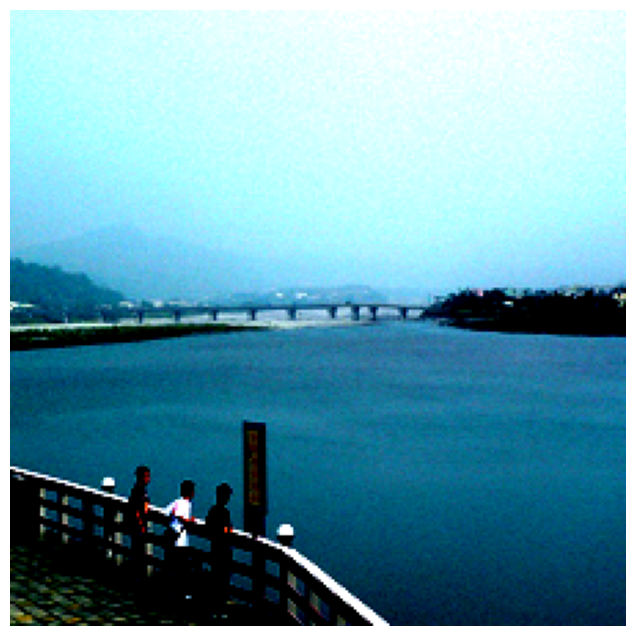

In [8]:
# load an image from the dataloader and plot it
import matplotlib.pyplot as plt

for batch in dataloader:
    print(batch[0][0])
    plt.figure(figsize=(16, 8))
    plt.axis('off')
    plt.imshow(batch[0][0].permute(1, 2, 0))
    break

In [1]:
import sys
sys.path.append("..")
from datasets_custom import build_dataset

args = {
    "data_set": "IMNET",
    "data_dir": "data",
    "split": "train",
    'input_size': 224,
    'color_jitter': 0.4,
    'aa': 'rand-m9-mstd0.5',
    'reprob': 0.25,
    'remode': 'pixel',
    'recount': 1,
    'train_interpolation': 'bicubic',
}

# make these arguments into argparse style
class Args:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

args = Args(**args)

dataset_train, nb_classes, transforms = build_dataset(is_train=True, args=args)

/home/user01/anaconda3/envs/vim_kh/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch

def custom_collate_fn(batch):
    images = [example['pixel_values'] for example in batch]
    targets = [example['label'] for example in batch]
    return images, targets


args.batch_size = 256
args.num_workers = 4
args.pin_mem = True

sampler_train = torch.utils.data.RandomSampler(dataset_train)
data_loader_train = torch.utils.data.DataLoader(
    dataset_train, sampler=sampler_train,
    batch_size=args.batch_size,
    num_workers=args.num_workers,
    pin_memory=args.pin_mem,
    drop_last=True,
    collate_fn=custom_collate_fn
)

In [3]:
data_loader_train.dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 1281167
})

In [4]:
sample = next(iter(data_loader_train))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


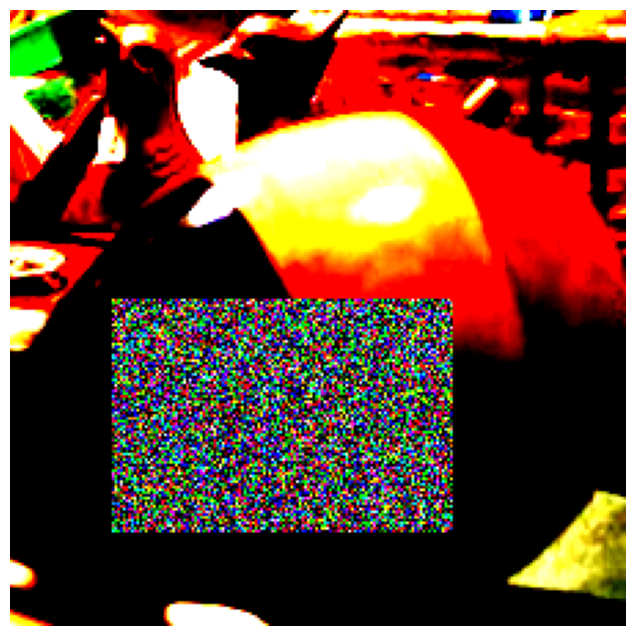

In [10]:
# load an image from the dataloader and plot it
import matplotlib.pyplot as plt

for batch in data_loader_train:
    plt.figure(figsize=(16, 8))
    plt.axis('off')
    plt.imshow(batch[0][0].permute(1, 2, 0))
    break

In [1]:
import torch
from torchvision import transforms
from PIL import Image
import timm
from datasets import load_dataset
from timm.data import create_transform


# Define constants for normalization
IMAGENET_DEFAULT_MEAN = (0.485, 0.456, 0.406)
IMAGENET_DEFAULT_STD = (0.229, 0.224, 0.225)

def build_transform(is_train, args):
    resize_im = args.input_size > 32
    if is_train:
        # Create the transformation pipeline for training
        transform = create_transform(
            input_size=args.input_size,
            is_training=True,
            color_jitter=args.color_jitter,
            auto_augment=args.aa,
            interpolation=args.train_interpolation,
            re_prob=args.reprob,
            re_mode=args.remode,
            re_count=args.recount,
        )
        if not resize_im:
            transform.transforms[0] = transforms.RandomCrop(args.input_size, padding=4)

        def hugging_face_transform(images):
            images['pixel_values'] = [transform(image.convert("RGB")) for image in images["image"]]
            return images
        
        return transform, hugging_face_transform

    # Create the transformation pipeline for evaluation
    t = []
    if resize_im:
        size = int(args.input_size / args.eval_crop_ratio)
        t.append(transforms.Resize(size, interpolation=3))
        t.append(transforms.CenterCrop(args.input_size))

    t.append(transforms.ToTensor())
    t.append(transforms.Normalize(mean=IMAGENET_DEFAULT_MEAN, std=IMAGENET_DEFAULT_STD))

    def hugging_face_transform(images):
        images['pixel_values'] = [transforms.Compose(t)(image.convert("RGB")) for image in images["image"]]
        return images
    
    return transforms.Compose(t), hugging_face_transform

def build_dataset(is_train, args):
    transform, hugging_face_transform = build_transform(is_train, args)

    if args.data_set == 'CIFAR':
        dataset = load_dataset('cifar100', split='train' if is_train else 'test')
        dataset.set_transform(hugging_face_transform)
        nb_classes = 100
    elif args.data_set == 'IMNET':
        dataset = load_dataset("imagenet-1k", split="train" if is_train else "validation")
        dataset.set_transform(hugging_face_transform)
        nb_classes = 1000
    # elif args.data_set == 'INAT':
    #     dataset = INatDataset(args.data_path, train=is_train, year=2018,
    #                           category=args.inat_category, transform=transform)
    #     nb_classes = dataset.nb_classes
    # elif args.data_set == 'INAT19':
    #     dataset = INatDataset(args.data_path, train=is_train, year=2019,
    #                           category=args.inat_category, transform=transform)
    #     nb_classes = dataset.nb_classes

    return dataset, nb_classes, transform

# Example args structure
class Args:
    input_size = 224
    color_jitter = 0.4
    aa = 'rand-m9-mstd0.5-inc1'
    train_interpolation = 'bicubic'
    reprob = 0.25
    remode = 'pixel'
    recount = 1
    eval_crop_ratio = 0.875
    data_set = 'IMNET'
    data_path = 'path/to/data'
    inat_category = 'name_of_category'

args = Args()




/home/user01/anaconda3/envs/vim_kh/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Building dataset for training
dataset, nb_classes, transform = build_dataset(is_train=True, args=args)

# Create a DataLoader
from torch.utils.data import DataLoader

def collate_fn(batch):
    images = torch.stack([item['pixel_values'] for item in batch])
    # Assuming there's a 'label' field
    labels = torch.tensor([item['label'] for item in batch])
    return images, labels

dataloader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

In [3]:
# Iterate over the DataLoader
for batch in dataloader:
    images = batch['pixel_values']
    labels = batch['label']
    # Your training code here
    print(images.shape, labels.shape)
    break

torch.Size([32, 3, 224, 224]) torch.Size([32])


In [9]:
import sys
sys.path.append("..")
import utils

metric_logger = utils.MetricLogger(delimiter="  ")
for samples, targets in metric_logger.log_every(dataloader, 10):
    print(samples.shape, targets.shape)
    break


Iterable
torch.Size([32, 3, 224, 224]) torch.Size([32])
